In [2]:
from scipy import stats
from scipy import integrate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (6, 4.)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['axes.titlesize']=20.
rcParams['axes.grid']=True
rcParams['grid.linewidth'] = 0.5
# import seaborn as sb
# sb.despine()
# sb.set_style('white', {'xes.linewidth': 0.5, 'axes.edgecolor':'black'})
# sb.despine(left=True)

# Γραμμικό μοντέλο 
Έχουμε ένα σύνολο $N>2$ σημείων $(x_i,y_i)$ με γνωστές gaussian αποκλίσεις $\sigma _{yi}$ στη $y$ διεύθυνση και χωρίς καμία απροσδιοριστία στη $x$ διεύθυνση.

Αναζητούμε τη συνάρτηση $f(x)$ της μορφής: $ f(x)=\theta _1 x+\theta _0 $ η οποία προσαρμόζεται καλύτερα στα σημεία.
Ακολουθούμε τη μέθοδο των ελαχίστων τετραγώνων, δηλαδή προσπαθούμε να βρούμε τις τιμές $\theta_0, \theta_1$ οι οποίες ελαχιστοποιούν τη ποσότητα
$$
\chi ^2 = \sum _N \frac{(y_i-f(x_i))^2}{\sigma_i^2}
$$


In [242]:
a_true=2.
b_true=-3
N_data=10
error=3

In [243]:
def model(x,a,b): return a*x+b
def model_sd(x,da,db): return np.sqrt((x*da)**2+db**2)

x_data=np.linspace(0,10,N_data)
y_true=model(x,a_true,b_true)
# sigma=np.ones(N_data)*error
sigma=2*np.random.rand(N_data)*error
y_data=np.random.normal(y_true,sigma)

<ErrorbarContainer object of 3 artists>

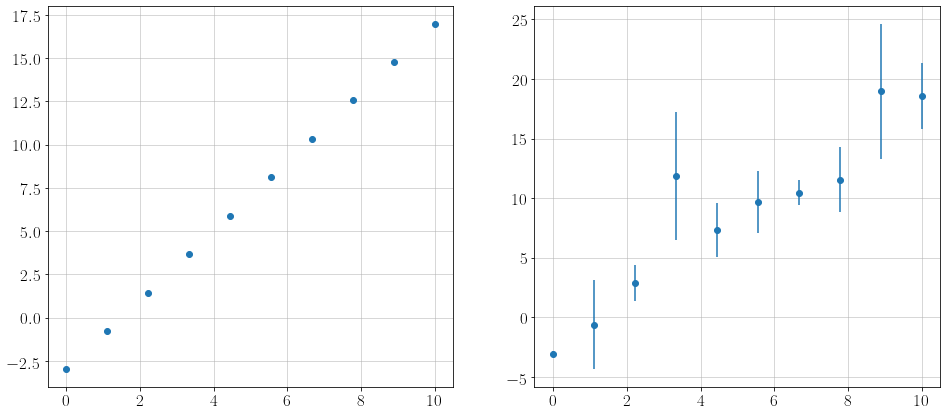

In [244]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
ax[0].plot(x_data,y_true,'o')
ax[1].errorbar(x_data,y_data,yerr=sigma,fmt='o')

Για το γραμμικό μοντελο υπάρχει κλειστή λύση, στη βιβλιογραφία αναφέρεται με διάφορους τρόπους. 

Κατασκευάζουμε τους πίνακες 
\begin{align}
\mathbf{Y}=\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N\end{pmatrix} &&
\mathbf{A}=\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix} &&
\mathbf{C}=\begin{pmatrix} 
\frac{1}{\sigma ^2_{y1}} & 0 & 0 & \cdots & 0 \\ 
0 & \frac{1}{\sigma ^2_{y2}} & 0 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & 0 & \cdots & \frac{1}{\sigma ^2_{yN}} \end{pmatrix} &&
\bar{\theta} = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}
\end{align}

Τότε το $\chi^2$ γράφεται σαν 
\begin{equation}
\chi^2 = [ \mathbf{Y}-\mathbf{A} \bar{\theta}]^{T} \mathbf{C}^{-1}  [ \mathbf{Y}-\mathbf{A} \bar{\theta}]
\end{equation}

* Μετρική απόσταση μεταξύ του μοντέλου και των δεδομένων σε ένα χώρο με μετρική που ορίζεται από τον αντίστροφο πίνακα των σφαλμάτων.

Αποδεικνύεται (παραγωγίζοντας) ότι η λύση καλύτερης προσαρμογης δίνεται από τη:
\begin{equation}
\begin{pmatrix} b \\ m \end{pmatrix} = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} = \bar{\theta}= [\mathbf{A}^T \mathbf{C} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C} \mathbf{Y}]
\end{equation}

Η ποσότητα $[\mathbf{A}^T \mathbf{C} \mathbf{A}]^{-1}$ ονομάζεται Fisher Information και μας δίνει τα σφάλματα στις παραμέτρους. Είναι **ανεξάρτητη** των δεδομένων, δηλαδή τα σφάλματα στις παραμέτρους εξαρτόνται μόνο από τα σφάλματα των μετρήσεων, και όχι πχ απο τη διασπορά τους.

$$
\sigma _{\theta}= \begin{pmatrix} \sigma_ {\theta_0}^2 & \sigma_ {\theta_0 \theta_1} \\ \sigma_ {\theta_1 \theta_0} & \sigma_ {\theta_1} ^2   \end{pmatrix}
$$


[-3.04095957  2.11001112] [0.20104788 0.11983766]
[[ 0.04042025 -0.00620773]
 [-0.00620773  0.01436106]]


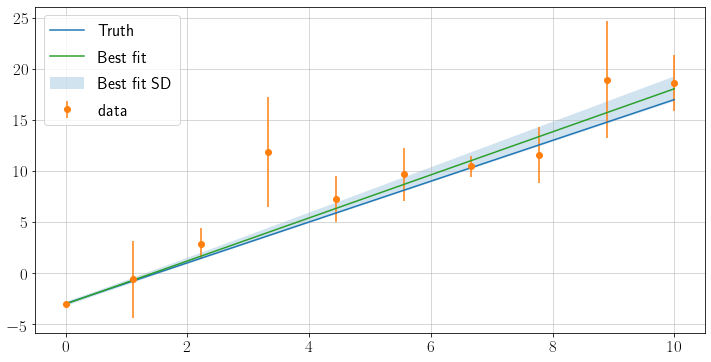

In [245]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(x_data,y_true,label='Truth')
ax.errorbar(x_data,y_data,yerr=sigma,fmt='o',label='data')

Y=y_data
A=np.stack((np.ones(x_data.shape[0]),x_data),axis=-1)
C=np.diagflat(1./sigma**2)
fisher=np.linalg.inv(A.T.dot(C.dot(A)))
K=A.T.dot(C.dot(Y))
M=np.dot(fisher,K)
dM=np.sqrt(np.diag(fisher))
print(M,dM)
print(fisher)
ax.plot(xx,model(xx,M[1],M[0]),label='Best fit')
ax.fill_between(xx,model(xx,M[1],M[0])-model_sd(xx,dM[1],dM[0]),model(xx,M[1],M[0])+model_sd(xx,dM[1],dM[0]),label='Best fit SD',alpha=0.2)
ax.legend()

Με το παραπάνω τρόπο μπορούμε να επεκτείνουμε τη τάξη του πολυωνύμου (μοντέλο) όσο θέλουμε. 

\begin{align}
\mathbf{Y}=\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N\end{pmatrix} &&
\mathbf{A}=\begin{pmatrix} 1 & x_1 & x_1 ^2\\ 1 & x_2 & x_2^2\\ \vdots & \vdots \\ 1 & x_N & x_N^2 \end{pmatrix} &&
\mathbf{C}=\begin{pmatrix} 
\frac{1}{\sigma ^2_{y1}} & 0 & 0 & \cdots & 0 \\ 
0 & \frac{1}{\sigma ^2_{y2}} & 0 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & 0 & \cdots & \frac{1}{\sigma ^2_{yN}} \end{pmatrix}&&
\bar{\theta} = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix}
\end{align}

Αποδεικνύεται (παραγωγίζοντας) ότι η λύση καλύτερης προσαρμογης δίνεται από τη:
\begin{equation}
\begin{pmatrix} \theta _0 \\ \theta _1 \\ \theta _2 \end{pmatrix} = \bar{\theta}= [\mathbf{A}^T \mathbf{C} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C} \mathbf{Y}]
\end{equation}


[-3.04095957  2.11001112] [0.04042025 0.01436106]
[-3.05193805  2.38998484 -0.03909771] [0.20191176 0.49066824 0.06644568]
[[ 0.04076836 -0.01508522  0.00123972]
 [-0.01508522  0.24075532 -0.03161546]
 [ 0.00123972 -0.03161546  0.00441503]]


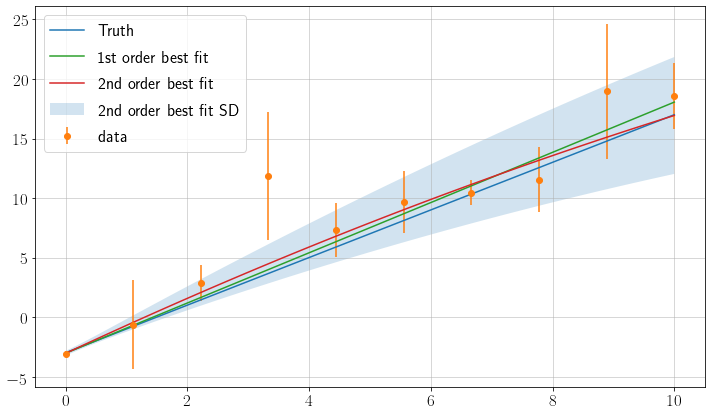

In [246]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
ax.plot(x_data,y_true,label='Truth')
ax.errorbar(x_data,y_data,yerr=sigma,fmt='o',label='data')

Y=y_data
A=np.stack((np.ones(x_data.shape[0]),x_data),axis=-1)
C=np.diagflat(1./sigma**2)
fisher=np.linalg.inv(A.T.dot(C.dot(A)))
K=A.T.dot(C.dot(Y))
M=np.dot(fisher,K)
dM=np.diag(fisher)
print(M,dM)
ax.plot(x_data,model(x_data,M[1],M[0]),label='1st order best fit')

def model2(x,a,b,c): return a*x**2+b*x+c
def model2_sd(x,a,da,db,dc): return np.sqrt((2*a*da*x)**2+(x*db)**2+dc**2)
A2=np.stack((np.ones(x_data.shape[0]),x_data,x_data**2),axis=-1)
C2=np.diagflat(1./sigma**2)
fisher2=np.linalg.inv(A2.T.dot(C2.dot(A2)))
K2=A2.T.dot(C2.dot(Y))
M2=np.dot(fisher2,K2)
dM2=np.sqrt(np.diag(fisher2))
print(M2,dM2)
print(fisher2)
ax.plot(xx,model2(xx,M2[2],M2[1],M2[0]),label='2nd order best fit')
ax.fill_between(xx,model2(xx,M2[2],M2[1],M2[0])-model2_sd(xx,dM2[2],M2[2],dM2[1],dM2[0]),model2(xx,M2[2],M2[1],M2[0])+model2_sd(xx,dM2[2],M2[2],dM2[1],dM2[0]),label='2nd order best fit SD',alpha=0.2)

ax.legend()

Στη περίπτωση που το πρόβλημα δεν λύνεται αναλυτικά, τότε μπορούμε αριθμητικά να υπολογίσουμε το σημείο όπου η $\chi^2$ γίνεται ελάχιστη.

In [247]:
def chi2(theta): return np.sum((y_data-model(x_data,theta[1],theta[0]))**2/sigma**2)

In [248]:
from scipy import optimize
theta_guess = [1, 0]
theta_est = optimize.fmin(chi2, theta_guess)

Optimization terminated successfully.
         Current function value: 4.226284
         Iterations: 71
         Function evaluations: 133


In [249]:
theta_est

array([-3.04092648,  2.11000116])

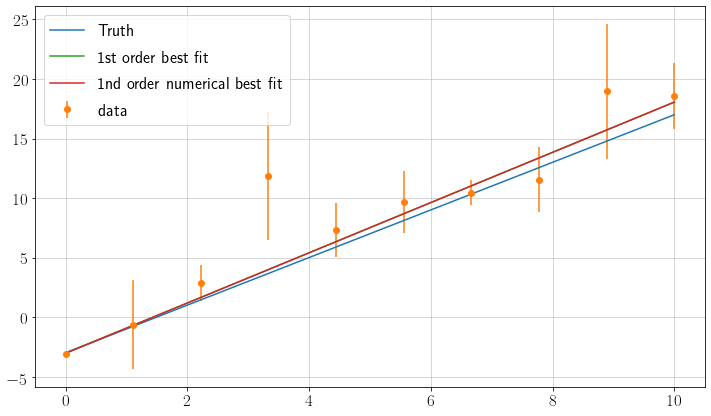

In [251]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
ax.plot(x_data,y_true,label='Truth')
ax.errorbar(x_data,y_data,yerr=sigma,fmt='o',label='data')
xx=np.linspace(x_data.min(),x_data.max(),100)
ax.plot(xx,model(xx,M[1],M[0]),label='1st order best fit')
#ax.plot(xx,model2(xx,M2[2],M2[1],M2[0]),label='2nd order best fit')
ax.plot(xx,model(xx,theta_est[1],theta_est[0]),label='1nd order numerical best fit')
ax.legend()

In [269]:
NN=300
bb=np.linspace(-23,23,NN)
mm=np.linspace(-6,9,NN)
LogL=np.zeros((len(bb),len(mm)))
for i,b in enumerate(bb):
    for j,m in enumerate(mm):
        LogL[i,j]=np.sum((y_data-model(x_data,m,b))**2/sigma**2)
        
N=len(x_data)
d=N-2
LogL=LogL/d

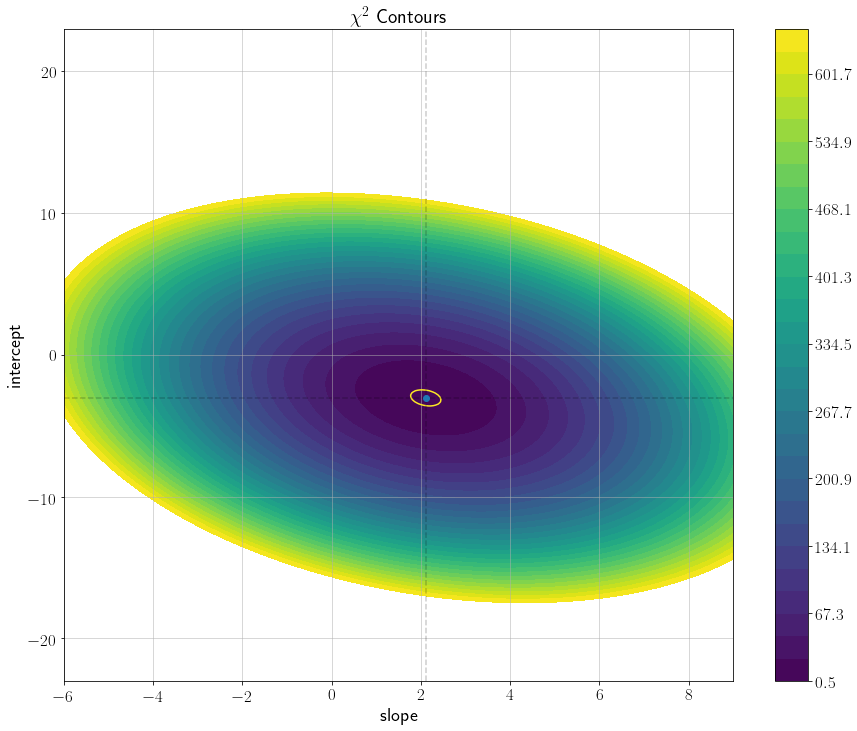

In [270]:

#print(LogL.min(),LogL.min()/d,(LogL.min()/d-1.)/np.sqrt(2./d))
fig,ax=plt.subplots(1,1,figsize=(15,12))
c=ax.contourf(mm,bb,LogL,np.linspace(LogL.min(),1200*LogL.min(),30))#,extent=[mm.min(),mm.max(),bb.min(),bb.max()])
c2=ax.contour(mm,bb,LogL,[LogL.min(),LogL.min()+1.])#,extent=[mm.min(),mm.max(),bb.min(),bb.max()])
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.vlines(M[1],bb.min(),bb.max(),linestyles='--',alpha=0.2)
ax.hlines(M[0],mm.min(),mm.max(),linestyles='--',alpha=0.2)
ax.plot([M[1]],[M[0]],'o',label='Minimum at [{:.2f},{:.2f}]'.format(M[1],M[0]))
ax.set_title('$\chi ^2$ Contours')
plt.colorbar(c,ax=ax)
#ax.legend()

Στο παραπάνω παράδειγμα κάναμε κάποιες παραδοχές:
* Γνωρίζουμε το μοντέλο $f(x;a,b,...)$
* Θεωρήσαμε ότι τα σφάλματα των μετρήσεων μας είναι **γνωστά** και ότι έχουν Gaussian κατανομή
* Τα σφάλματα είναι ανεξάρτητα μεταξύ τους (ούτε συστηματικά λάθη)
* Δεν υπάρχει απροσδιοριστία στα x
* Δεν υπάρχει intrinsic διασπορά των δεδομένων

Η μέθοδος ελαχίστων τετραγώνων είναι **μέθοδος μεγιστοποίησης της πιθανοφάνειας**
\begin{align}
L(D|\bar{\theta})=\prod _{i=1}^N \frac{1}{\sqrt{2\pi \sigma^2}} e^ {\Big( -\frac{(y_i-f(x_i,\bar{\theta}))^2}{2\sigma ^2} \Big)} \\
\log L(D|\bar{\theta}) \sim-\sum_{i=1}^N \Big(\frac{(y_i-f(x_i,\bar{\theta}))^2}{2\sigma ^2} \Big)
\end{align}


In [254]:
import pymc3 as pm

In [255]:
with pm.Model() as lmodel: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    #sigma = HalfCauchy('sigma', beta=10, testval=1.)
    slope = pm.Uniform('slope', -50,50)
    intercept = pm.Uniform('Intercept', -50, 50)
    

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + slope * x_data,sigma=sigma, observed=y_data)

    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, slope]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:01<00:00, 3831.45draws/s]


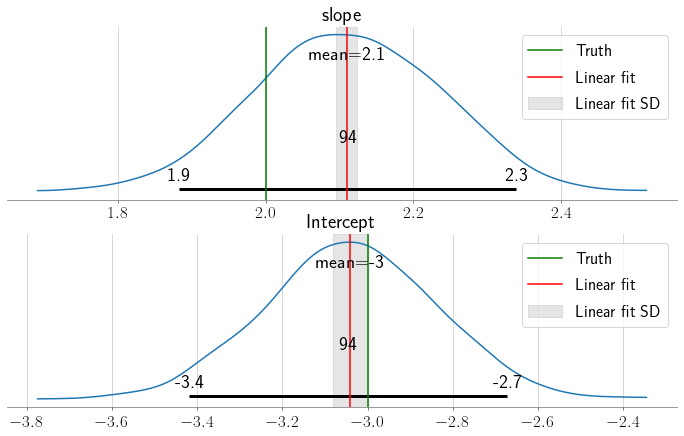

In [256]:
fig,axes=plt.subplots(2,1,figsize=(12, 7))
pm.plot_posterior(trace[100:],ax=axes)

axes[0].axvline(a_true,color='g',label='Truth')
axes[0].axvline(M[1],color='r',label='Linear fit')
axes[0].axvspan(M[1]-dM[1],M[1]+dM[1],color='grey',label='Linear fit SD',alpha=0.2)
axes[0].legend()

axes[1].axvline(b_true,color='g',label='Truth')
axes[1].axvline(M[0],color='r',label='Linear fit')
axes[1].axvspan(M[0]-dM[0],M[0]+dM[0],color='grey',label='Linear fit SD',alpha=0.2)
axes[1].legend()



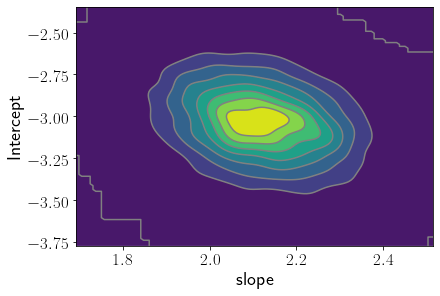

In [257]:
pm.pairplot(trace[100:],kind='kde')

In [258]:
import emcee
import corner
from multiprocessing import Pool


In [259]:

#weights=np.ones(t.shape)
def priors(param,priorarr,gaussianp):
    outofrange=0
    for i in range(param.shape[0]):
        outofrange+=1-(priorarr[i,0] <= param[i] <= priorarr[i,1])
    if outofrange:
        return -np.inf
    else:
        prob=0.0
    for gp in gaussianp:
        prob+= -0.5*(param[gp[0]]-gp[1])**2/gp[2]**2-np.log10(gp[1]*gp[2])
    return prob

def lnprob(param,priorarr,gaussianp):
    ### This function calls the others above, first checking that params are valid, and if so returning the log-likelihood.
    prior = priors(param,priorarr,gaussianp)
    if not np.isfinite(prior):
        return -np.inf
    #     if np.isnan(prior+lnlike(param)):
    #         print(param,prior,lnlike(param),prior+lnlike(param))
    return prior+lnlike(param)

def loggauss(x,mu,sigma):
    return -(x-mu)**2/(2*sigma**2)-np.log(sigma)#-np.log(2*np.pi)/2

def lnlike(param):
    a,b=param
    M=model(x_data,a,b)
    data=y_data
    return np.sum(stats.norm.logpdf(data,M,sigma))##np.sum(loggauss(M,data,sigma))

In [260]:
lnlike([a_true,b_true]),lnlike([1.7,-1.4]),lnlike([1.7,-14])

(-19.13025585705121, -52.948588352511216, -1667.735439019154)

In [261]:
def mcmc_fit(lnprob,priorarr,walkers,nsteps,cores,gaussianp=[],name=None):    
    ndim = priorarr.shape[0] # How many parameters to fit
    nwalkers = ndim*walkers#60#16#4 # Minimum of 2 walkers per free parameter
    print(ndim,nwalkers/cores)

    pos = [np.random.uniform(priorarr[:,0],priorarr[:,1]) for i in range(nwalkers)]
    kwargs={'priorarr':priorarr,'gaussianp':gaussianp}

    if name is not None:
        filename=name+'.h5'
        backend = emcee.backends.HDFBackend(filename,name=name)
        backend.reset(nwalkers, ndim)
    else:
        backend=None

    with Pool(cores) as pool:
        #sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob,pool=pool,backend=backend,kwargs=kwargs,
        #moves=[(emcee.moves.DEMove(),0.5),(emcee.moves.DESnookerMove(),0.25),(emcee.moves.StretchMove(),0.25),])# Setup the sampler
        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob,pool=pool,backend=backend,kwargs=kwargs,)
        result=sampler.run_mcmc(pos, nsteps,progress=True)
    samples = sampler.chain[:, 0:, :].reshape((-1, ndim))
    return samples

def corner_res(samples,burn=100,truths=None,fpars=None,ranges=None,sigmas=[0.5,1,2,3],smooth=0,savefig=None):
    samples=samples[burn:,:]
    med = np.quantile(samples,q=[0.25,0.5,0.75],axis=0)[1]
    truths = med if truths is None else truths
    levels=[1-np.exp(-s**2/2) for s in sigmas]#(1-np.exp(-0.5**2/2),1-np.exp(-1**2/2),1-np.exp(-2**2/2),1-np.exp(-3**2/2))
    fpars = ['p{}'.format(i) for i in range(samples.shape[1])] if fpars is None else fpars
    Q=np.quantile(samples,q=[0.16,0.5,0.84],axis=0)
    if ranges is None:
        Q10=np.quantile(samples,q=[0.03,0.97],axis=0)
        ranges=Q10.T
    for fpar,q in zip(fpars,Q.T):
        print(f"Parameter {fpar} quantiles  ({q[0]:.2f} - {q[1]:.2f} - {q[2]:.2f})")
    fig = corner.corner(samples, labels=fpars,range=ranges,show_titles=True,truths=truths,quantiles=[0.16,0.5,0.84],levels=levels,smooth=smooth)#,truths=list(fit.best_values.values())
    if savefig is not None:
        plt.savefig(savefig)
    return med

In [262]:
priorarr=np.array([[-50,50],[-50,50]])#,[0.9,5]])
samples= mcmc_fit(lnprob,walkers=32,nsteps=6000,cores=10,priorarr=priorarr)#,gaussianp=[[1,7,3],[3,0.025,0.015]])#[[0,14,2],[3,0.025,0.015]])

2 6.4


100%|██████████| 6000/6000 [00:36<00:00, 164.98it/s]


Parameter a quantiles  (1.99 - 2.11 - 2.23)
Parameter b quantiles  (-3.25 - -3.04 - -2.84)


array([ 2.11071157, -3.0423761 ])

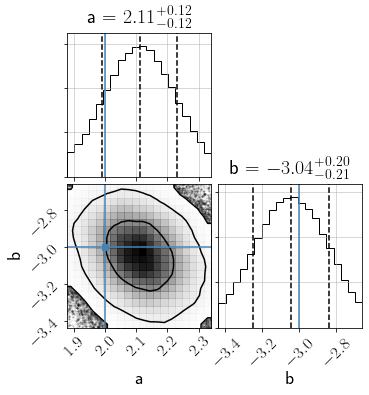

In [268]:
corner_res(samples,burn=600,truths=[a_true,b_true],fpars=['a','b'],ranges=None,sigmas=[1,2,3],smooth=0.6,savefig=None)

Ορίζουμε την συνάρτηση της απόστασης φωτεινότητας.
$$
D_L(z)= (1+z) \frac{c}{H_0}\int _0 ^z \frac{1}{\sqrt{\Omega _m (1+z')^3 +1 -\Omega _m}} dz'
$$ 

In [44]:
from scipy import integrate
def f(z,Om): return 1./np.sqrt(Om*(1.+z)**3+1.-Om)

def lum_dist(z,c=3e5,Om=0.3,Ho=70.0):
    '''
    luminocity distance (imposing flat LambdaCDM cosmology)
    Input: (float) redshift,c (in km/sec), Omega, H0 (in km/(s*pc))
    Output: (float) luminocity distance (units: Μpc)
    '''
    olokl = integrate.quad(f,0.,z,args=(Om))
    res = (1.0 + z)*(c/Ho) * olokl[0]
    return res

In [46]:
dataSN = np.loadtxt('SupernovaData.txt', usecols=(1,2,3))
z=dataSN[:,0]
m_obs=dataSN[:,1]
m_error=dataSN[:,2]
dl=np.array([lum_dist(zi) for zi in z])

/home/astromix/miniconda3/envs/ARCenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


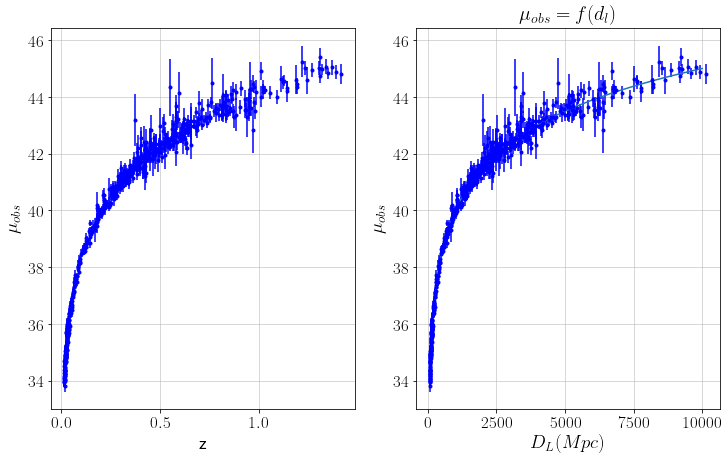

In [52]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].errorbar(z,m_obs,yerr=m_error,fmt='.',color = 'blue')
ax[0].set(xlabel='z',ylabel='$\mu_{obs}$')
ax[0].grid(True)

ax[1].errorbar(dl,m_obs,yerr=m_error,fmt='.',color = 'blue')
DD=np.linspace(0,10000)
ax[1].plot(DD,5*np.log10(DD)+25)
ax[1].set(title='$\mu_{obs} = f(d_l)$',xlabel='$D_{L}(Mpc)$',ylabel='$\mu_{obs}$')
ax[1].grid(True)

In [54]:
import emcee
import corner

In [71]:
log_likelihood([0.3,70],z,m_obs,m_error),log_posterior([0.43317898, -31.30194926],z,m_obs,m_error)

[0.3, 70] -235.17392542044735
[0.43317898, -31.30194926] nan


/home/astromix/miniconda3/envs/ARCenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


(117.58696271022367, nan)

In [75]:
def log_prior(theta,bound):
    outofrange=0
    for i in range(len(theta)):
        outofrange+=1-(bound[i,0] <= theta[i] <= bound[i,1])
    if outofrange:
        return -np.inf
    else:
        return 0.0
    
def log_likelihood(theta,z,mu,e):
    Om,Ho=theta
    D=np.array([lum_dist(zi,c=3e5,Om=Om,Ho=Ho) for zi in z])
    m_model=5*np.log10(D)+25
    return -0.5*np.sum(np.log(2*np.pi*e**2)+(m_model-mu)**2/e**2)

def log_posterior(theta, z,mu,e,bound):
    prior=log_prior(theta,bound)
    if not np.isfinite(prior):
        return -np.inf
    return prior+log_likelihood(theta, z,mu,e)



In [76]:
# same setup as above:
ndim, nwalkers = 2, 10
nsteps, nburn = 1000, 100

bound=np.array([[0,1],[3,200]])
# we'll start at random locations between 0 and 2000
starting_guesses = [np.random.uniform(bound[:,0],bound[:,1]) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[z,m_obs,m_error,bound])
sampler.run_mcmc(starting_guesses, nsteps,progress=True)

#sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)

100%|██████████| 1000/1000 [03:39<00:00,  4.56it/s]


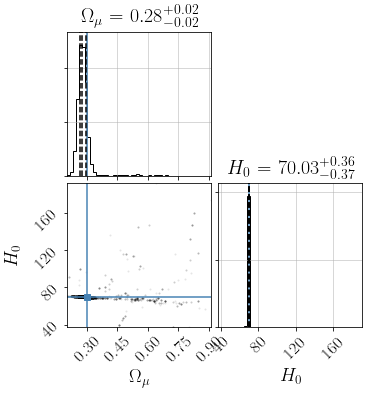

In [80]:
rcParams['figure.figsize'] = (15, 15)
co=corner.corner(sampler.flatchain, labels=['$\Omega _\mu$','$H_0$'],show_titles=True,quantiles=[0.25,0.5,0.75],truths=[0.3,70],smooth=0.25,bins=50,)